In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv("../input/titanic/test.csv")
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")

In [3]:
train.head()
# train.profile_report()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# test.profile_report()

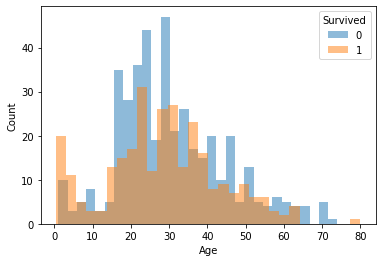

In [5]:
plt.hist(train.loc[train["Survived"] == 0, "Age"].dropna(), bins=30, alpha=0.5, label="0")
plt.hist(train.loc[train["Survived"] == 1, "Age"].dropna(), bins=30, alpha=0.5, label="1")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived")

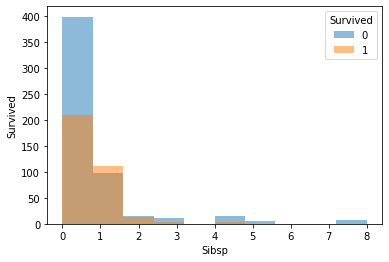

In [6]:
plt.hist(train.loc[train["Survived"]==0, "SibSp"].dropna(),range=(0,8), bins=10, alpha=0.5, label="0")
plt.hist(train.loc[train["Survived"]==1, "SibSp"].dropna(),range=(0,8), bins=10, alpha=0.5, label="1")
plt.xlabel("Sibsp")
plt.ylabel("Survived")
plt.legend(title="Survived")

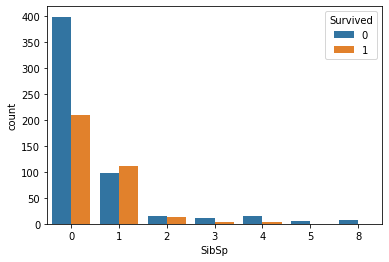

In [7]:
sns.countplot(x="SibSp", hue="Survived", data=train)
plt.legend(loc="upper right", title="Survived")

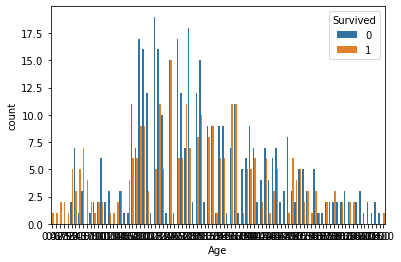

In [8]:
sns.countplot(x="Age", hue="Survived", data=train)
plt.legend(loc="upper right", title="Survived")

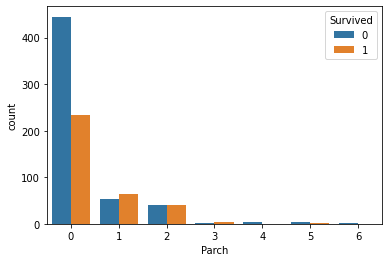

In [9]:
sns.countplot(x="Parch", hue="Survived", data=train)
plt.legend(loc="upper right", title="Survived")

(10.0, 250.0)

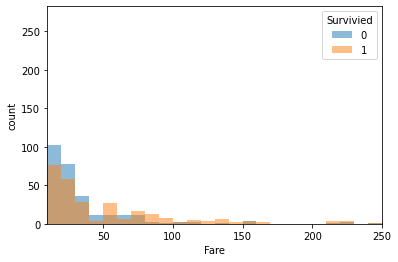

In [10]:
plt.hist(train.loc[train["Survived"]==0, "Fare"].dropna(), range=(0, 250), bins=25, alpha=0.5, label="0")
plt.hist(train.loc[train["Survived"]==1, "Fare"].dropna(), range=(0, 250), bins=25, alpha=0.5, label="1")
plt.xlabel("Fare")
plt.ylabel("count")
plt.legend(title="Survivied")
plt.xlim(10, 250)

(-5.0, 250.0)

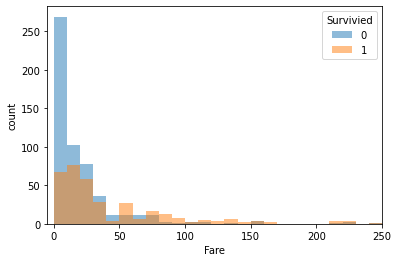

In [11]:
plt.hist(train.loc[train["Survived"]==0, "Fare"].dropna(),range=(0,250), bins=25, alpha=0.5, label="0")
plt.hist(train.loc[train["Survived"]==1, "Fare"].dropna(),range=(0,250), bins=25, alpha=0.5, label="1")
plt.xlabel("Fare")
plt.ylabel("count")
plt.legend(title="Survivied")
plt.xlim(-5, 250)

<AxesSubplot:xlabel='HighFare', ylabel='count'>

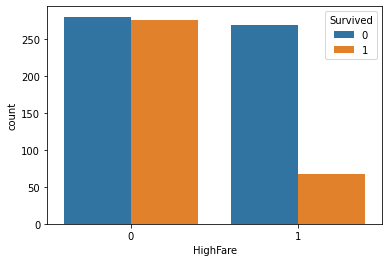

In [12]:
subset=train.loc[:,["Survived", "Fare"]]
subset["HighFare"] = 0
subset.loc[subset["Fare"]<10, "HighFare"] = 1
sns.countplot(x="HighFare", hue="Survived", data=subset)

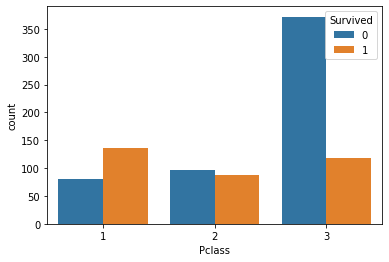

In [13]:
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.legend(loc="upper right", title="Survived")

<AxesSubplot:xlabel='Sex', ylabel='count'>

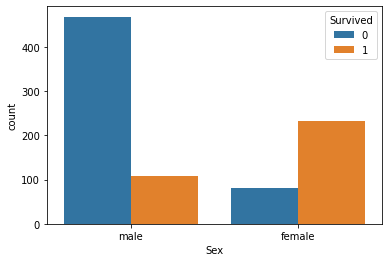

In [14]:
sns.countplot(x="Sex", hue="Survived", data=train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

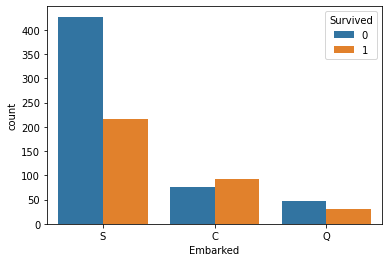

In [15]:
sns.countplot(x="Embarked", hue="Survived", data=train)

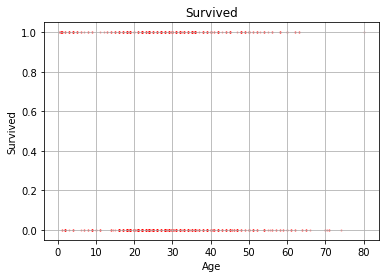

In [16]:
plt.scatter(x=train["Age"], y=train["Survived"], s=1, alpha=0.5, color="red")
plt.title("Survived")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.grid(True)

In [17]:
data = pd.concat([train, test], sort = False)
data["Sex"].replace(["male","female"], [0,1],inplace=True)

In [18]:
data["FamilySize"] = data["Parch"] + data["SibSp"] + 1
train["FamilySize"] = data["FamilySize"][:len(train)]
test["FamilySize"] = data["FamilySize"][len(train):]

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

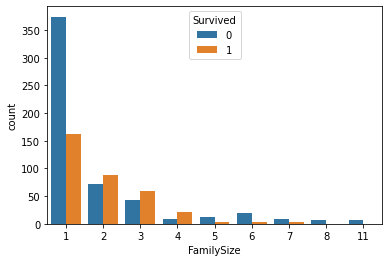

In [19]:
sns.countplot(x="FamilySize", hue="Survived", data=train)

<AxesSubplot:xlabel='IsAlone', ylabel='count'>

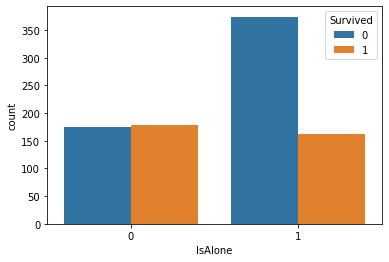

In [20]:
data["IsAlone"] = 0
data.loc[data["FamilySize"] == 1,"IsAlone"] = 1

train["IsAlone"] = data["IsAlone"][:len(train)]
test["IsAlone"] = data["IsAlone"][len(train):]
sns.countplot(x="IsAlone", hue="Survived", data=train)

In [21]:
data["LowFare"] = 0
data.loc[data["Fare"]<10, "LowFare"] = 1
print(data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked' 'FamilySize' 'IsAlone' 'LowFare']


In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,LowFare
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2,0,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,1,1


In [23]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
FamilySize        0
IsAlone           0
LowFare           0
dtype: int64

In [24]:
data["Fare"].fillna(np.mean(data["Fare"]), inplace=True)

In [25]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
FamilySize        0
IsAlone           0
LowFare           0
dtype: int64

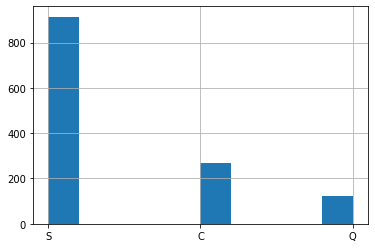

In [26]:
data["Embarked"].hist()
data["Embarked"].fillna("S", inplace=True)
data["Embarked"] = data["Embarked"].map({"S":0, "C":1, "Q":2}).astype(int)

In [27]:
age_avg = data["Age"].mean()
age_std = data["Age"].std()
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Fare"].fillna(data["Fare"].mean(), inplace=True)

In [28]:
delete_columns = ["Name", "PassengerId", "SibSp", "Parch", "Ticket", "Cabin"]
# data_ = 
data.drop(delete_columns, axis=1, inplace=True)
# print(data_.columns.values)

In [29]:
train = data[:len(train)]
test = data[len(train):]

In [30]:
y_train = train["Survived"]
x_train = train.drop("Survived", axis=1)
x_test = test.drop("Survived", axis=1)

In [31]:
# train.profile_report()

In [32]:
# test.profile_report()

In [33]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty="l2",solver="sag", random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
from sklearn import tree
target = train["Survived"].values
feature = train[["Pclass", "Sex", "Fare"]].values
mytree = tree.DecisionTreeClassifier()
mytree = mytree.fit(feature, target)

test_features = test[["Pclass", "Sex", "Age", "Fare"]]

In [35]:
sub = pd.read_csv("../input/titanic/gender_submission.csv")
sub["Survived"] = list(map(int, y_pred))
sub.to_csv("submission.csv", index=False)